<img src="https://upload.wikimedia.org/wikipedia/fr/8/81/Sciences_SU.png" width="600" height="240" align="center"/>

# <!-- TITLE --> Rendu 


### Objectives :

....


### Etudiants :

- Nom : SAKR                                                         
- Prénom : Mohamed Walid    



- Nom : NABTI        
- Prenom : Anes  

- Nom : FEZAI       
- Prenom : Yousri

- Nom : BOUIN       
- Prenom : Salomé



## 1. Importation des bibliothéques

In [12]:
import numpy as np
import pandas as pd
import os
import matplotlib.image as mpimg
from utils.plots import plot_images

In [13]:
N_IMAGES = 202599
dataset_table = f'{os.getcwd()}/data/list_attr_celeba.txt'
attr_lines = [line.rstrip() for line in open(dataset_table, 'r')]
attr_keys = 'file_name' + ' '+ attr_lines[1]
matdata = []
for i in range(1,N_IMAGES):
    if i == 1:
        list_data = np.array(attr_keys.replace('  ',' ').replace(',','').split()).reshape(1,-1)[0]
    else:
        list_data = np.array(attr_lines[i].replace('-1','0').replace('  ',' ').replace(',','').split()).reshape(1,-1)[0]
    matdata.append(list_data)
np.save(f'{os.getcwd()}/data/ATTRIBUTS.npy',np.array(matdata))
"""
    with open('./data/list_attr_celebatest.csv', 'a', newline='') as f_object:  
        # Pass the CSV  file object to the writer() function
        writer_object = writer(f_object)
        # Result - a writer object
        # Pass the data in the list as an argument into the writerow() function
        writer_object.writerow(list_data)  
        # Close the file object
        f_object.close()
"""

"\n    with open('./data/list_attr_celebatest.csv', 'a', newline='') as f_object:  \n        # Pass the CSV  file object to the writer() function\n        writer_object = writer(f_object)\n        # Result - a writer object\n        # Pass the data in the list as an argument into the writerow() function\n        writer_object.writerow(list_data)  \n        # Close the file object\n        f_object.close()\n"

## Have a Look

Load attributs

In [14]:
dataset_desc = pd.read_csv('./data/list_attr_celeba.csv')
dataset_desc.head(5)

,file_name,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [15]:
print(f'\nDonnées manquantes : {dataset_desc.isna().sum().sum()}')
print(f'dataset attributes shape : {dataset_desc.shape}')


Données manquantes : 0
dataset attributes shape : (202597, 41)


Load images ( a changer avec la fonction de Anes)

In [39]:
read_img=[]
PATH = os.getcwd()
for i in range (1, 12) :
    if i % 10000 == 0:
        print('iteration :',i)
    read_img.append(mpimg.imread(PATH + "\\data\\img_align_celeba\\%06i.jpg" % i)[20:-20]) 

In [40]:
import random
#samples = [ random.randint(0,len(read_img)-1) for i in range(11)]
samples = [i for i in range(len(read_img))]
print("Samples of our loaded images : ",samples)

Samples of our loaded images :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [41]:
y = list(dataset_desc["Smiling"][samples])
print("Attribut smiling values for loaded images : " ,y)

Attribut smiling values for loaded images :  [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1]


Plots images

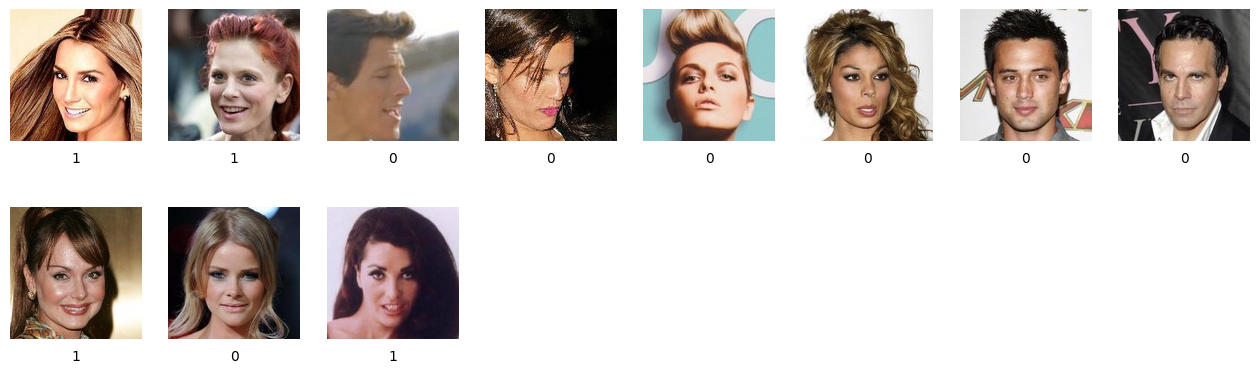

In [42]:
plot_images(read_img, y = y, indices=samples, columns=8, x_size=2, y_size=2)

### - Few statistics
We want to know if our images are homogeneous in terms of size, ratio, width or height.

In [20]:
data_size  = []
data_ratio = []
data_lx    = []
data_ly    = []

for image in read_img:
    (lx,ly,lz) = image.shape
    data_size.append(lx*ly/1024)
    data_ratio.append(lx/ly)
    data_lx.append(lx)
    data_ly.append(ly)

df=pd.DataFrame({'Size':data_size, 'Ratio':data_ratio, 'Lx':data_lx, 'Ly':data_ly})
display(df.describe().style.format("{0:.2f}").set_caption("About our images :"))

,Size,Ratio,Lx,Ly
count,11.00,11.00,11.00,11.00
mean,30.94,1.00,178.00,178.00
std,0.00,0.00,0.00,0.00
min,30.94,1.00,178.00,178.00
25%,30.94,1.00,178.00,178.00
50%,30.94,1.00,178.00,178.00
75%,30.94,1.00,178.00,178.00
max,30.94,1.00,178.00,178.00


In [21]:
import numpy as np

test = np.load('./data/ATTRIBUTS.npy')

In [22]:
print(test)

[['file_name' '5_o_Clock_Shadow' 'Arched_Eyebrows' ... 'Wearing_Necklace'
  'Wearing_Necktie' 'Young']
 ['000001.jpg' '0' '1' ... '0' '0' '1']
 ['000002.jpg' '0' '0' ... '0' '0' '1']
 ...
 ['202595.jpg' '0' '0' ... '0' '0' '1']
 ['202596.jpg' '0' '0' ... '0' '0' '1']
 ['202597.jpg' '0' '0' ... '0' '0' '1']]
